# UTSA CS 3793/5233: Assignment-4

**Last Name - First Name - (abc123)**






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natural Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [ ]:
# import all required libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import layers, optimizers, losses, metrics

from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

Mounted at /content/drive


# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(20 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following:

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [ ]:
# Load the data - training as well as testing
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

train_images = train_images / 255.0
test_images = test_images / 255.0
# Prepare the data that can be used by the next step - creating and training the DL model


# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']



169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


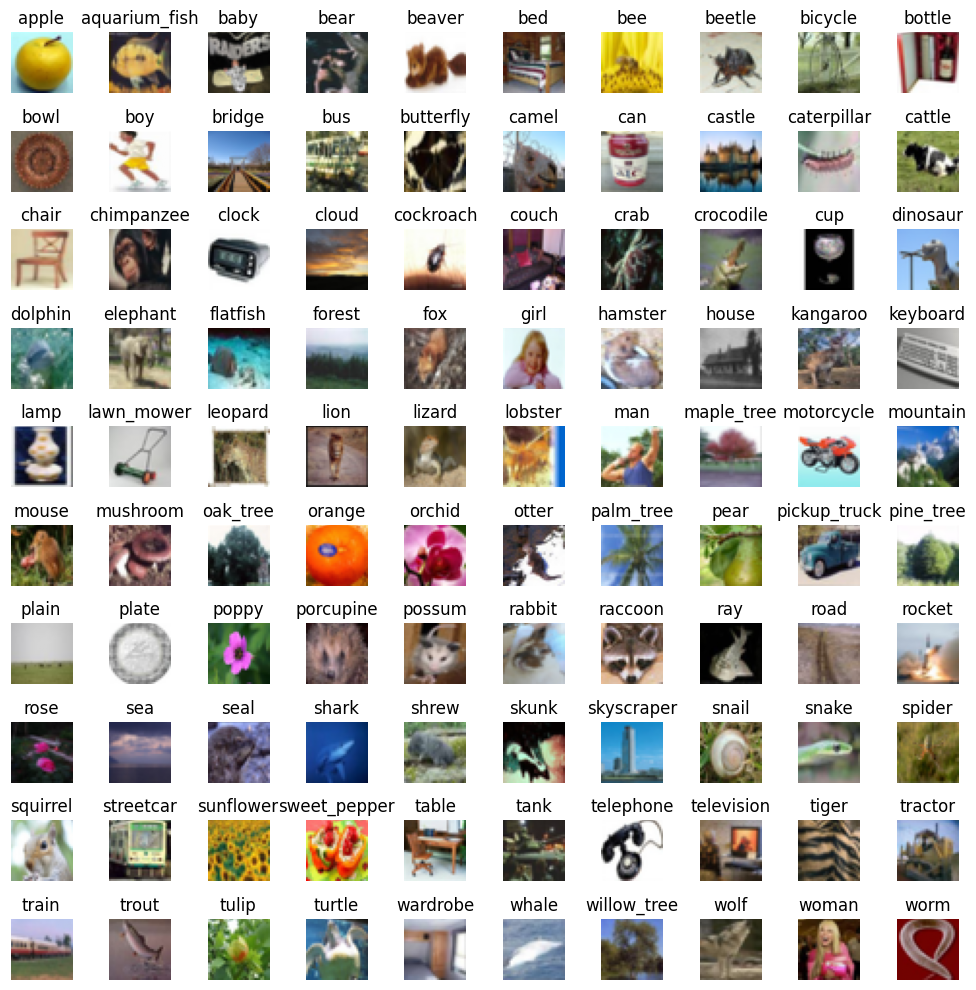

In [ ]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    idx = np.random.choice(np.where(train_labels == i)[0])
    plt.imshow(train_images[idx])
    plt.title(fine_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


## CNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [ ]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='softmax')
    #layers.Dense(100, activation='accuracy')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Print the DL model summary

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,420 (1.41 MB)

 Trainable params: 368,420 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_path = "/content/drive/My Drive/Colab Notebooks/cifar/best_model.weights.h5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)




In [ ]:
# Train/fit the DL model using the training CIFAR-100 data
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=32,
    validation_split=0.20,
    callbacks=[model_checkpoint_callback]  # Save best model during training
)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.0520 - loss: 4.2571 - val_accuracy: 0.1564 - val_loss: 3.5355
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.1992 - loss: 3.3173 - val_accuracy: 0.2367 - val_loss: 3.1333
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.2703 - loss: 2.9424 - val_accuracy: 0.2974 - val_loss: 2.8405
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.3217 - loss: 2.6648 - val_accuracy: 0.3078 - val_loss: 2.7892
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.3610 - loss: 2.4857 - val_accuracy: 0.3316 - val_loss: 2.6754
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.3940 - loss: 2.3201 - val_accuracy: 0.3395 - val_loss: 2.6458
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.4253 - loss: 2.1665 - val_accuracy: 0.3376 - val_loss: 2.6754
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.4597 -

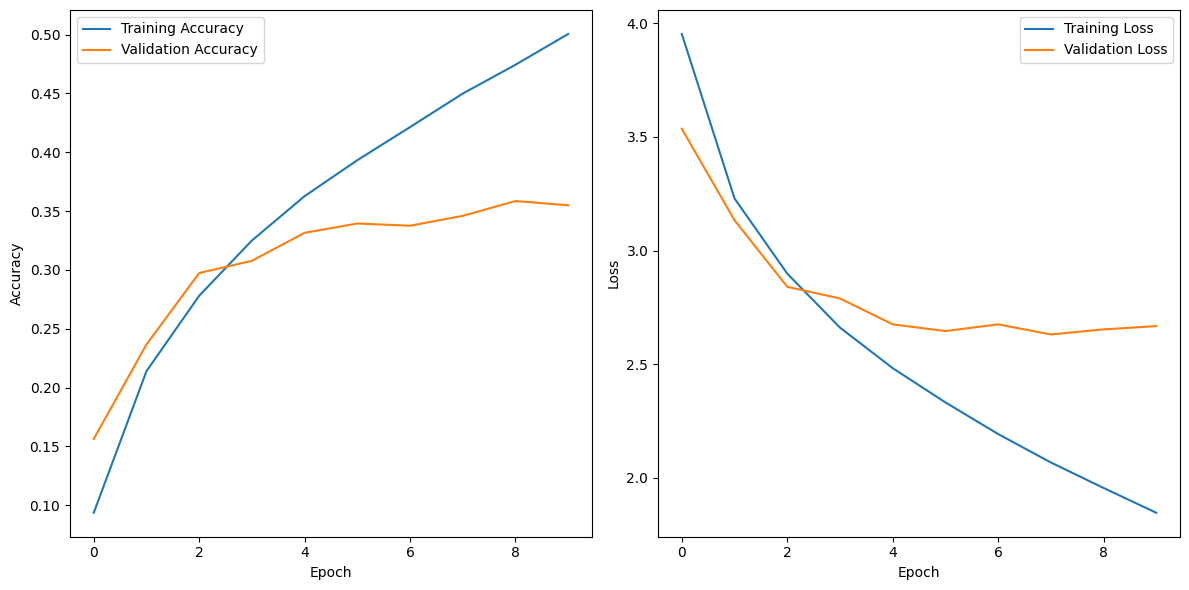

In [ ]:
# Plot the training/validation accuracy and loss

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model.

In [ ]:
# Re-initialize the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='softmax')
    #layers.Dense(100, activation='accuracy')
])


In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"

checkpoint_path = "/content/drive/My Drive/Colab Notebooks/cifar/best_model.weights.h5"
model.load_weights(checkpoint_path)


# compile the model with the same optimizer, loss, and metrics as before
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

# print the accuracy
print("Test Accuracy:", test_accuracy)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 10000
'y' sizes: 2246


# Natural Language Processing - RNN

The goal of this task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(15 points)

In this section, you will write code for the following:

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [ ]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word

from google.colab import drive
drive.mount('/content/drive')
# Set the vocabulary size
vocab_size = 10000

# Load the Reuters dataset with a limited vocabulary
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=vocab_size)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words

# vocabulary size and max sequence length
#vocab_size = 10000
#max_sequence_length = 200

# Pad the sequences to make them of equal length (with zeros)
#train_data = pad_sequences(train_data, maxlen=max_sequence_length, padding='post', truncating='post')
#test_data = pad_sequences(test_data, maxlen=max_sequence_length, padding='post', truncating='post')


# Pad sequences to have a consistent length
max_sequence_length = 500
train_data = pad_sequences(train_data, maxlen=max_sequence_length)
test_data = pad_sequences(test_data, maxlen=max_sequence_length)

# convert labels to one-hot encoded format
num_classes = 46  # number of unique classes
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# check the shape of the prepared data
print("Processed Training data shape:", train_data.shape)
print("Processed Testing data shape:", test_data.shape)

Processed Training data shape: (8982, 500)
Processed Testing data shape: (2246, 500)


## RNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [ ]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU

vocab_size = 10000
embedding_dim = 128
gru_units = 64
input_length = 100  # length of each padded newswire
num_classes = 46

# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
    GRU(units=gru_units),
    Dense(num_classes, activation='softmax')
])
model.build(input_shape=(None, input_length))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Print the DL model summary

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320,238 (5.04 MB)

 Trainable params: 1,320,238 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

None


## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"

path = "/content/drive/My Drive/Colab Notebooks/reuters/model.keras"
checkpoint = ModelCheckpoint(path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# compile the model with the same optimizer, loss, and metrics as before

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train/fit the DL model using the training Reuters data

batch_size = 32
epochs = 10
history=model.fit(train_data,
                    train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[checkpoint])



Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.3784 - loss: 2.6504
Epoch 1: val_accuracy improved from -inf to 0.48692, saving model to /content/drive/My Drive/Colab Notebooks/reuters/model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 420ms/step - accuracy: 0.3786 - loss: 2.6486 - val_accuracy: 0.4869 - val_loss: 1.8577
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.5275 - loss: 1.7543
Epoch 2: val_accuracy improved from 0.48692 to 0.55426, saving model to /content/drive/My Drive/Colab Notebooks/reuters/model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 90s 400ms/step - accuracy: 0.5275 - loss: 1.7543 - val_accuracy: 0.5543 - val_loss: 1.7001
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.5776 - loss: 1.6023
Epoch 3: val_accuracy improved from 0.55426 to 0.58097, saving model to /content/drive/My Drive/Colab Notebooks/reuters/model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 434ms/step - accuracy: 0.5777 - loss: 1.6022 - val_accuracy: 0.5810 - 

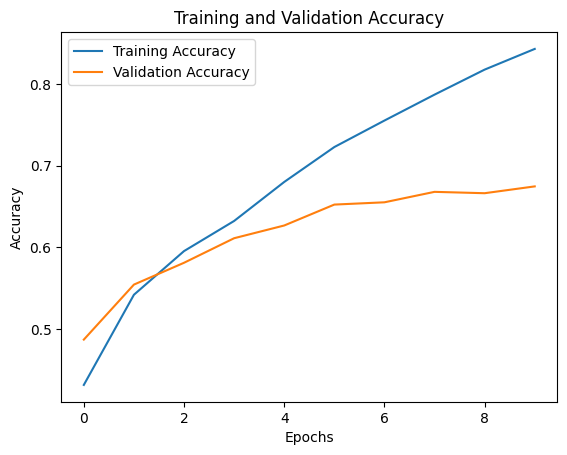

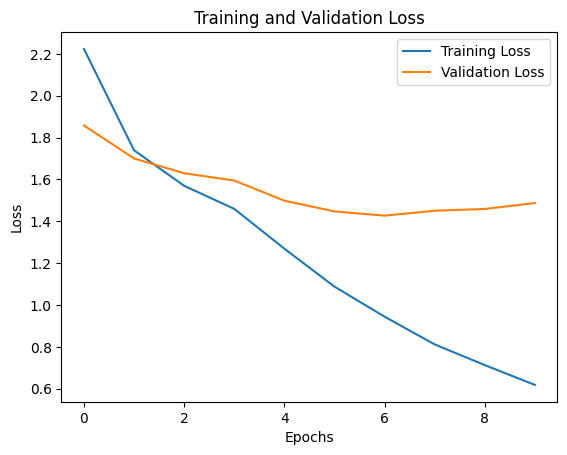

In [ ]:
# Plot the training/validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e., run this section directly after creating the model.

In [ ]:
# Re-initialize the model

vocab_size = 10000
max_sequence_length = 500

# create the RNN model
model = Sequential()

# Add an Embedding layer to convert integer word indices to dense vectors
embedding_dim = 128
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=max_sequence_length))

# Add an LSTM or GRU layer (choose one)
# LSTM Layer
# model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
# GRU Layer
model.add(GRU(units=64,
              dropout=0.2,
              recurrent_dropout=0.2))



# Add a Dense layer for multi-class classification (46 output categories)
num_classes = 46
model.add(Dense(units=num_classes,
                activation='softmax'))


model.build(input_shape=(None, input_length))


In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
path = "/content/drive/My Drive/Colab Notebooks/reuters/model.keras"
model.load_weights(path)


In [ ]:
# Evaluate the trained DL model on the Reuters test dataset

# Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

test_loss, test_accuracy = model.evaluate(test_data, test_labels, batch_size=32)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6209 - loss: 1.6221
Test Loss: 1.6595760583877563
Test Accuracy: 0.6175423264503479


Work Citation


https://pythonprogramming.net/recurrent-neural-network-deep-learning-python-tensorflow-keras/


https://github.com/SpencerPao/Data_Science/blob/main/RNN/RNN.ipynb

https://github.com/VikParuchuri/zero_to_gpt/blob/master/explanations/rnn.ipynb

# Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folders "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) and "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip)
4.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (20 points) Load/Prepare Data
    *   (15 points) CNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation
*   Natural Language Processing - RNN
    *   (15 points) Load/Prepare Data
    *   (15 points) RNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation

